# Data Exploration & Transformation – EDA

## Dataset Analysis
### 1. Import Libraries
### 2. Load & Display Sample Data
### 3. Dataset Stats (# of Rows & Columns)
### 4. Datatypes Identification
### 5. Isolate Numerical Columns
### 6. Group Feature & Target  Variable
### 7. Summary Statistics All Numerical Columns

### 1. Import Libraries

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import sys
import time
import logging
from prophet import Prophet
from matplotlib import dates as mpl_dates
from statsmodels.tsa.stattools import adfuller
from feature_engine.outliers import Winsorizer
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from xgboost.sklearn import XGBRegressor
from pmdarima import auto_arima
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error

warnings.filterwarnings("ignore")
logging.disable(logging.CRITICAL)

# Default setting to display all rows and columns without truncating.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 5000)

C:\Users\mak01\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mak01\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\mak01\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### 2. Load & Display Sample Data
Loading crypto data for EDA and feature engineering.

In [3]:
data = pd.read_excel(r"C:\Users\mak01\Desktop\Mihir\Project\Data Science Project\Data Cleaning - Python Scripts\crypto_sample_data.xlsx")
data.head()

,date_time,symbol,institution_total_holdings_usd,institution_holdings_per_share,total_address,new_address,active_address,transaction_count,transfers_volume_sum,tweets_count,crypto_volume_24h,price,market_cap
0,2022-06-03 22:29:00,BTC,19360000000,27.96,984824555,407870,953104,264776,2253034,117717,26587962530,29814,568192940280
1,2022-06-03 22:29:00,BTC,19360000000,27.96,984824555,407870,953104,264776,2253034,117717,26587962530,29814,568192940280
2,2022-06-04 04:29:00,BTC,18960000000,27.29,985241153,416598,942496,267374,2017528,109165,26014768622,29657,565190318332
3,2022-06-04 18:29:00,BTC,18960000000,27.29,985241153,416598,942496,267374,2017528,109165,17081484905,29749,566975235789
4,2022-06-04 18:29:00,BTC,18960000000,27.29,985241153,416598,942496,267374,2017528,109165,17081484905,29749,566975235789


### 3. Dataset Stats (# of Rows & Columns)

In [4]:
# Get total number of rows.
print("Rows:" , len(data.index))

# Get total number of columns.
print("Columns:", len(data.columns))

Rows: 305
Columns: 13


### 4. Datatypes Identification

#### Data Description

symbol - Crypto symbol.

institution_total_holdings_usd - The total crypto holdings by institutions in USD.

institution_holdings_per_share - Value of institution holdings per share.

total_address - The total number of unique addresses that ever appeared in a transaction of the native coin in the network.

new_address - The number of unique addresses that appeared for the first time in a transaction of the native coin in the network.

active_address - The number of unique addresses that were active in the network either as a sender or receiver. Only addresses that were active in successful transactions are counted.

transaction_count - The total amount of transactions, only successful transactions are counted.

transfers_volume_sum - The total amount of coins transferred on-chain, only successful transfers are counted.

tweets_count - The total number tweet on a particular day.

crypto_volume_24h - The total amount of crypto volume is last 24 hours.

price - Crypto price.

market_cap - The total market of a particular crypto.

last_updated - Date when it was last updated.

In [5]:
# Provide datatype information of each column in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date_time                       305 non-null    datetime64[ns]
 1   symbol                          305 non-null    object        
 2   institution_total_holdings_usd  305 non-null    int64         
 3   institution_holdings_per_share  305 non-null    float64       
 4   total_address                   305 non-null    int64         
 5   new_address                     305 non-null    int64         
 6   active_address                  305 non-null    int64         
 7   transaction_count               305 non-null    int64         
 8   transfers_volume_sum            305 non-null    int64         
 9   tweets_count                    305 non-null    int64         
 10  crypto_volume_24h               305 non-null    int64         
 11  price 

### 5. Isolate Numerical Columns
Segregating numerical columns for EDA and feature engineering.

In [6]:
# Find all the numerical columns.
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols].dtypes

institution_total_holdings_usd      int64
institution_holdings_per_share    float64
total_address                       int64
new_address                         int64
active_address                      int64
transaction_count                   int64
transfers_volume_sum                int64
tweets_count                        int64
crypto_volume_24h                   int64
price                               int64
market_cap                          int64
dtype: object

### 6. Group Feature & Target  Variable
Grouping all numerical columns for EDA and feature engineering.

In [7]:
feature_var = numerical_cols.drop('price')
target_var = ['price']

print('Feature Variable')
print(feature_var)

print('\n')

print('Target Variable')
print(target_var)

Feature Variable
Index(['institution_total_holdings_usd', 'institution_holdings_per_share',
       'total_address', 'new_address', 'active_address', 'transaction_count',
       'transfers_volume_sum', 'tweets_count', 'crypto_volume_24h',
       'market_cap'],
      dtype='object')


Target Variable
['price']


### 7. Summary Statistics All Numerical Columns
Get high level statistics of all numerical columns.

In [8]:
# Get summary statistics for numerical columns.
data.describe()

,institution_total_holdings_usd,institution_holdings_per_share,total_address,new_address,active_address,transaction_count,transfers_volume_sum,tweets_count,crypto_volume_24h,price,market_cap
count,3.050000e+02,305.000000,3.050000e+02,305.000000,305.000000,3.050000e+02,3.050000e+02,305.000000,3.050000e+02,305.000000,3.050000e+02
mean,1.078259e+10,22.753213,5.688843e+08,219908.373770,427693.298361,6.176490e+05,1.891381e+06,73756.655738,2.314312e+10,15718.049180,3.887487e+11
std,7.085063e+09,5.117035,4.169316e+08,157731.154015,434438.657488,3.784629e+05,6.098675e+05,46772.659334,8.809557e+09,14073.372237,1.798836e+11
min,2.010000e+09,16.570000,1.537131e+08,59655.000000,0.000000,2.011950e+05,7.842370e+05,25413.000000,7.849228e+09,1331.000000,1.612641e+11
25%,5.440000e+09,17.700000,1.539624e+08,64554.000000,0.000000,2.617090e+05,1.513566e+06,27140.000000,1.656152e+10,1790.000000,2.168472e+11
50%,5.680000e+09,18.500000,1.542947e+08,75809.000000,0.000000,9.503350e+05,1.637118e+06,37070.000000,2.201295e+10,1908.000000,2.310203e+11
75%,1.896000e+10,27.680000,9.859090e+08,397940.000000,905300.000000,9.960760e+05,2.253034e+06,116548.000000,2.971224e+10,29929.000000,5.705130e+11
max,2.018000e+10,29.040000,9.886220e+08,416598.000000,953104.000000,1.041812e+06,3.305862e+06,141948.000000,4.195653e+10,31637.000000,6.030062e+11


## Missing Values
Identifying 0 values via data & chart.

In [9]:
# Number of zero values for numerical columns.
(data[numerical_cols] == 0).sum(axis=0)

institution_total_holdings_usd      0
institution_holdings_per_share      0
total_address                       0
new_address                         0
active_address                    153
transaction_count                   0
transfers_volume_sum                0
tweets_count                        0
crypto_volume_24h                   0
price                               0
market_cap                          0
dtype: int64

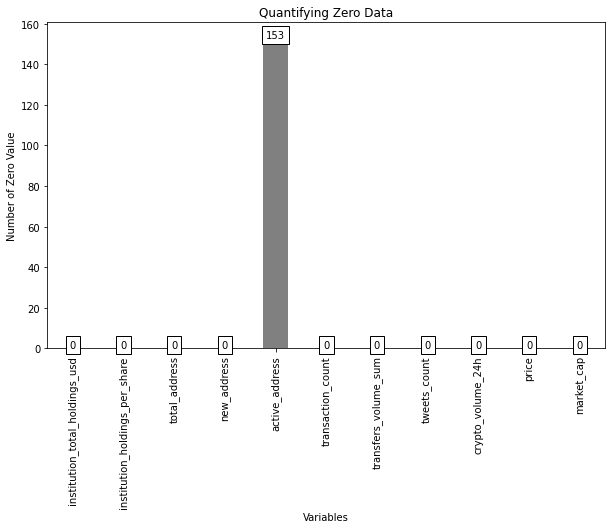

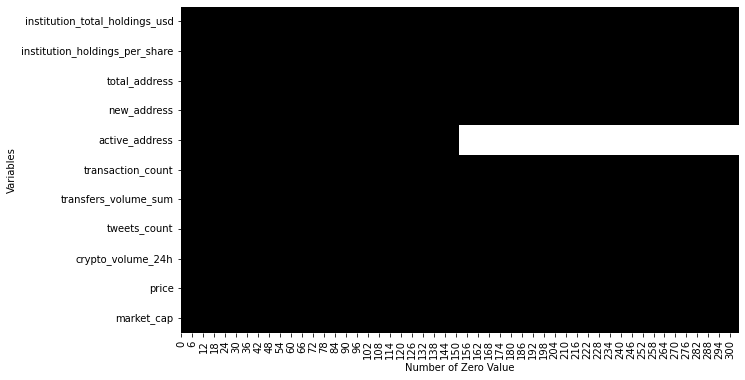

In [10]:
# Bar chart for number of zero values for numerical columns.
## Value label function.
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.text(i,y_list[i],y_list[i], ha='center', bbox = dict(facecolor = 'white', alpha =1.0))

## Declare variable for x and y axis.
variables = data[numerical_cols].columns
number_of_zero_values = (data[numerical_cols] == 0).sum(axis=0)

## Attributes for bar chart.
bar_chart_zero_value = (data[numerical_cols] == 0).sum(axis=0).plot.bar(figsize=(10,6), color= 'grey', 
                                         ylabel = 'Number of Zero Value',
                                         xlabel = 'Variables',
                                         title = 'Quantifying Zero Data')

## Instantiate value label function. 
add_value_label(variables, number_of_zero_values)

## Show the bar chart.
bar_chart_zero_value = plt.show()

# Heatmap for number of missing values for all columns.
plt.figure(figsize=(10,6))

heatmap_zero_value = sns.heatmap((data[numerical_cols] == 0).transpose(), cmap="Greys_r", cbar=None)

heatmap_zero_value.set(xlabel='Number of Zero Value', ylabel='Variables')

heatmap_zero_value = plt.show()

### Analysis of Missing Values

Only active_address column has missing values.

## Detecting Outliers
Detecting outliers via data & chart.

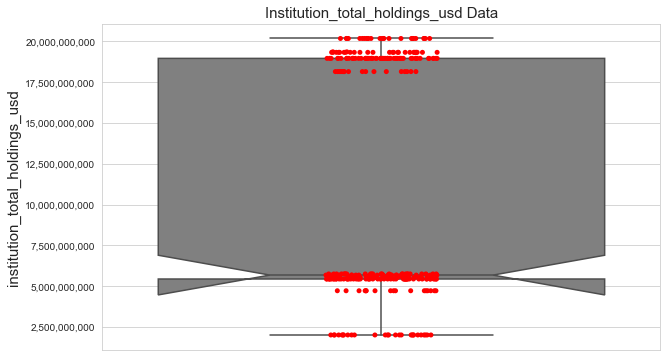

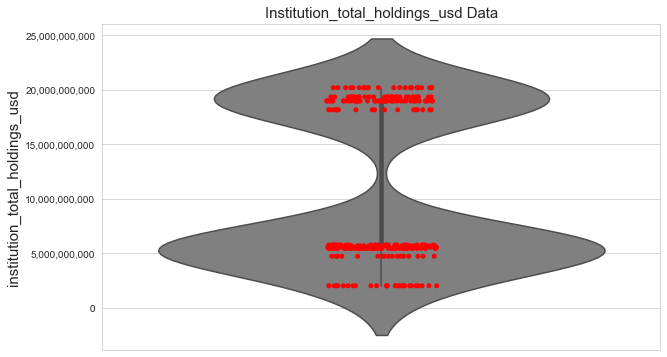

Institution_total_holdings_usd Statistics:
25%:  5440000000.0
75%:  18960000000.0
IQR:  13520000000.0
upper_boundary:  39240000000.0
lower_boundary:  -14840000000.0
total_outliers:  0
total_count:  305
%_of_outlier_data:  0.0%


Institution_total_holdings_usd Outlier Sample Data:
Series([], Name: institution_total_holdings_usd, dtype: int64)


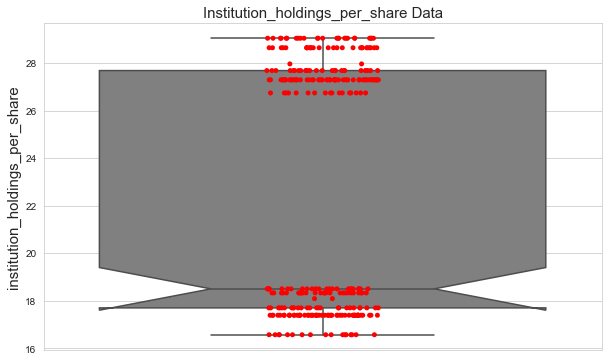

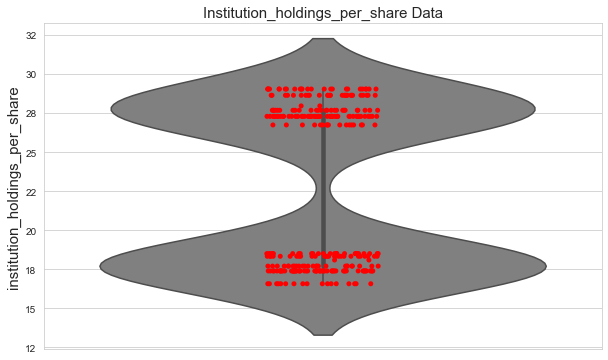

Institution_holdings_per_share Statistics:
25%:  17.7
75%:  27.68
IQR:  9.98
upper_boundary:  42.65
lower_boundary:  2.7299999999999986
total_outliers:  0
total_count:  305
%_of_outlier_data:  0.0%


Institution_holdings_per_share Outlier Sample Data:
Series([], Name: institution_holdings_per_share, dtype: float64)


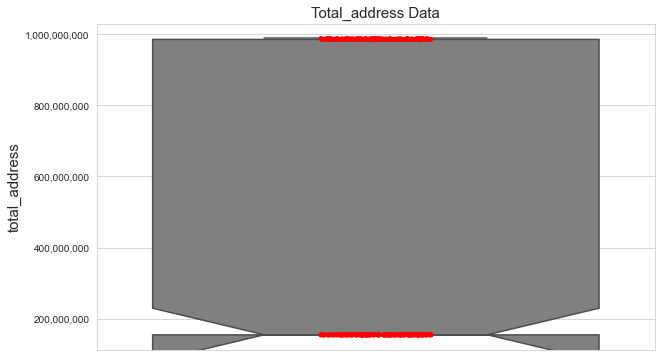

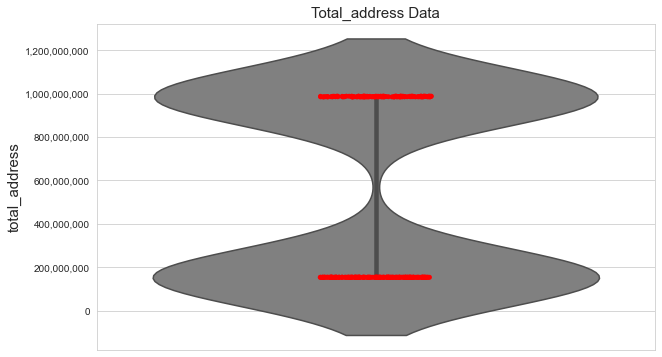

Total_address Statistics:
25%:  153962440.0
75%:  985908971.0
IQR:  831946531.0
upper_boundary:  2233828767.5
lower_boundary:  -1093957356.5
total_outliers:  0
total_count:  305
%_of_outlier_data:  0.0%


Total_address Outlier Sample Data:
Series([], Name: total_address, dtype: int64)


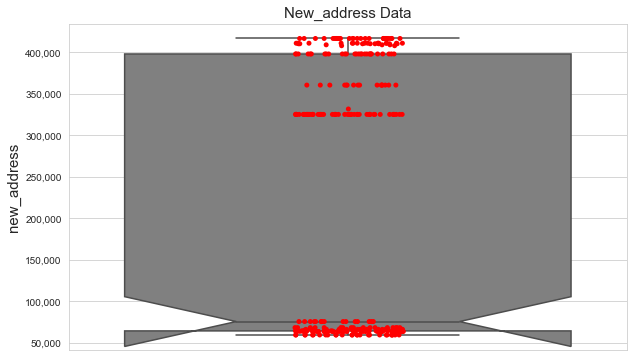

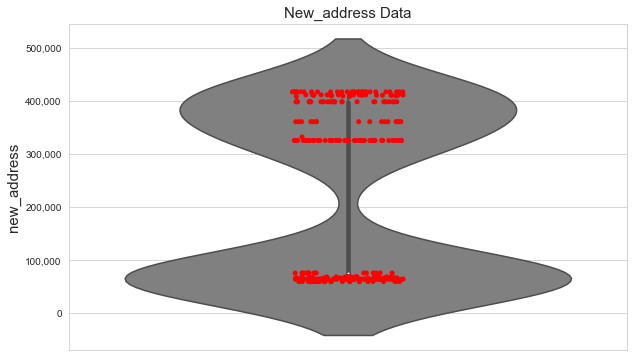

New_address Statistics:
25%:  64554.0
75%:  397940.0
IQR:  333386.0
upper_boundary:  898019.0
lower_boundary:  -435525.0
total_outliers:  0
total_count:  305
%_of_outlier_data:  0.0%


New_address Outlier Sample Data:
Series([], Name: new_address, dtype: int64)


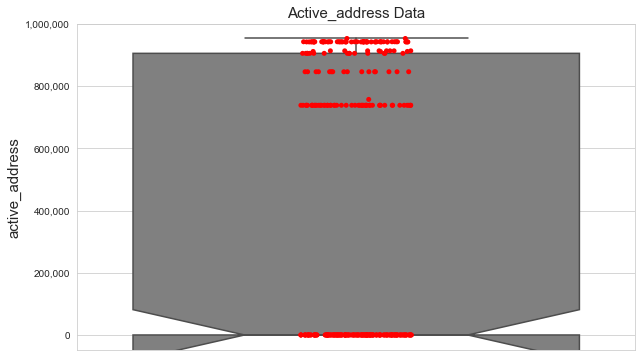

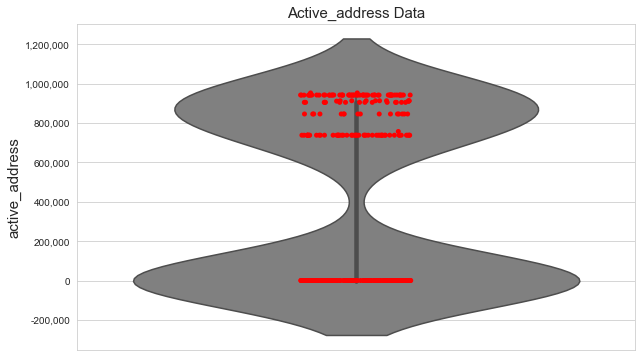

Active_address Statistics:
25%:  0.0
75%:  905300.0
IQR:  905300.0
upper_boundary:  2263250.0
lower_boundary:  -1357950.0
total_outliers:  0
total_count:  305
%_of_outlier_data:  0.0%


Active_address Outlier Sample Data:
Series([], Name: active_address, dtype: int64)


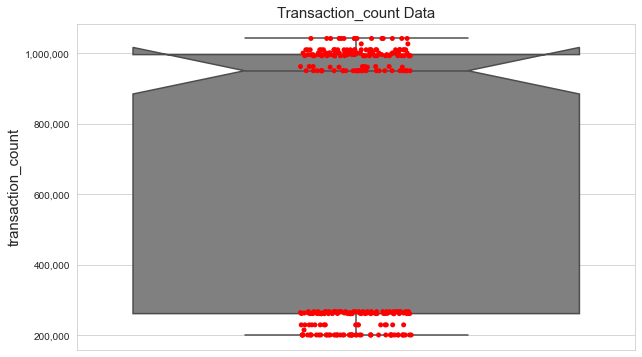

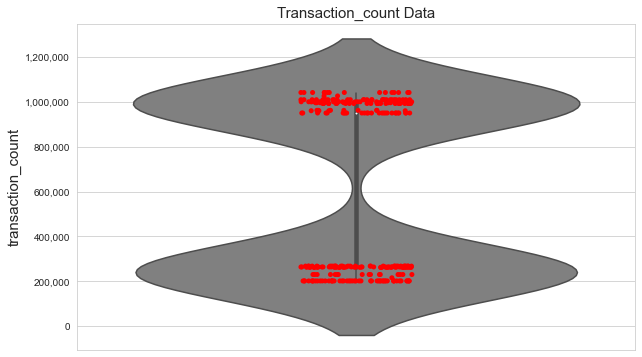

Transaction_count Statistics:
25%:  261709.0
75%:  996076.0
IQR:  734367.0
upper_boundary:  2097626.5
lower_boundary:  -839841.5
total_outliers:  0
total_count:  305
%_of_outlier_data:  0.0%


Transaction_count Outlier Sample Data:
Series([], Name: transaction_count, dtype: int64)


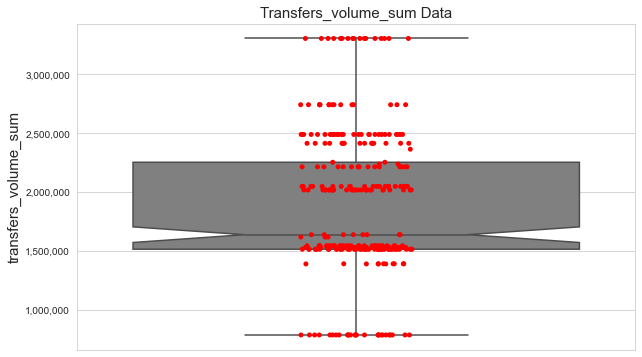

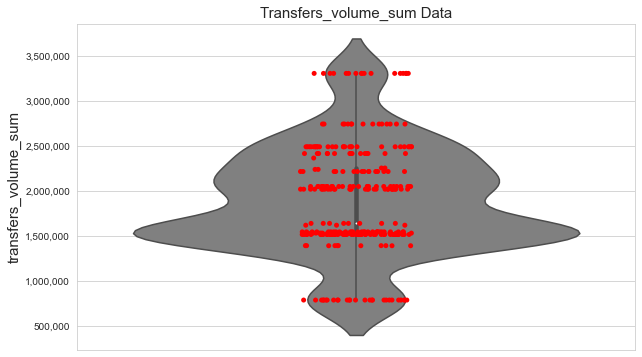

Transfers_volume_sum Statistics:
25%:  1513566.0
75%:  2253034.0
IQR:  739468.0
upper_boundary:  3362236.0
lower_boundary:  404364.0
total_outliers:  0
total_count:  305
%_of_outlier_data:  0.0%


Transfers_volume_sum Outlier Sample Data:
Series([], Name: transfers_volume_sum, dtype: int64)


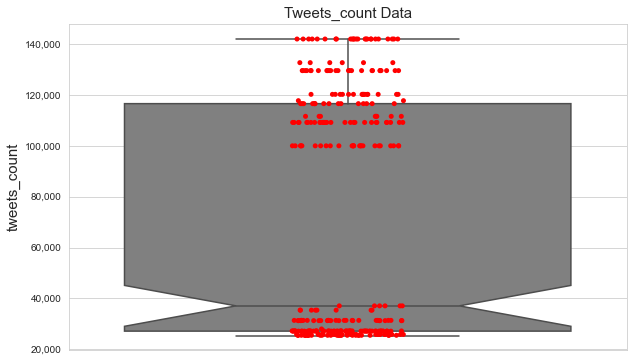

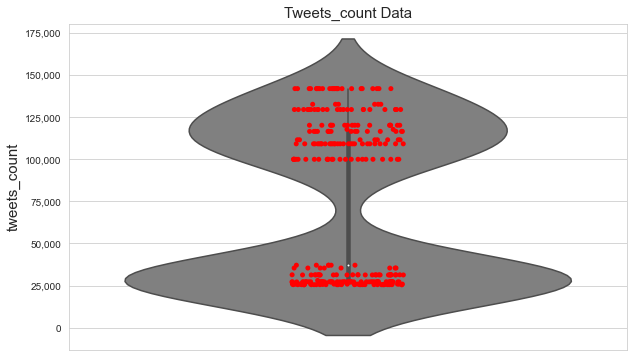

Tweets_count Statistics:
25%:  27140.0
75%:  116548.0
IQR:  89408.0
upper_boundary:  250660.0
lower_boundary:  -106972.0
total_outliers:  0
total_count:  305
%_of_outlier_data:  0.0%


Tweets_count Outlier Sample Data:
Series([], Name: tweets_count, dtype: int64)


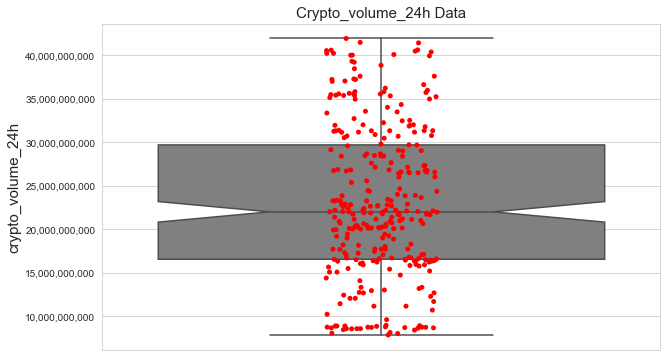

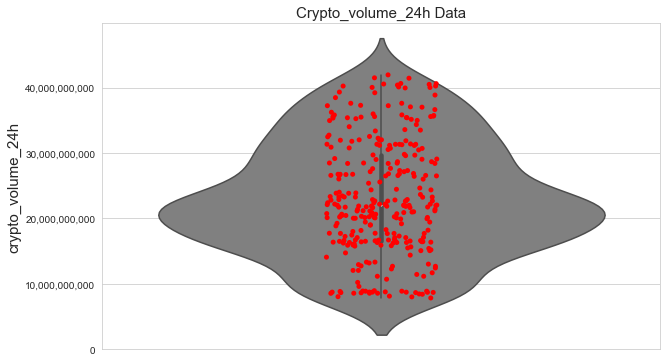

Crypto_volume_24h Statistics:
25%:  16561519763.0
75%:  29712242529.0
IQR:  13150722766.0
upper_boundary:  49438326678.0
lower_boundary:  -3164564386.0
total_outliers:  0
total_count:  305
%_of_outlier_data:  0.0%


Crypto_volume_24h Outlier Sample Data:
Series([], Name: crypto_volume_24h, dtype: int64)


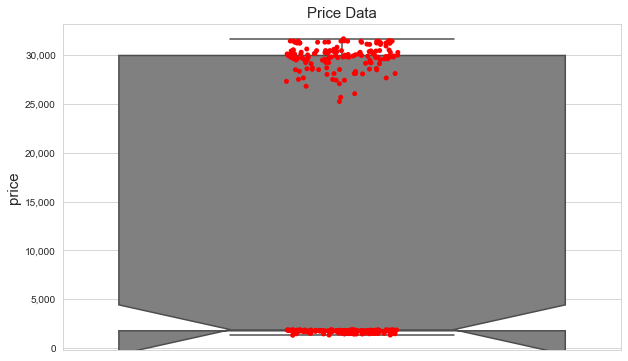

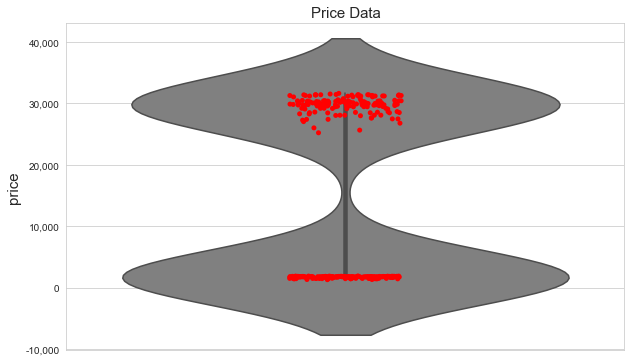

Price Statistics:
25%:  1790.0
75%:  29929.0
IQR:  28139.0
upper_boundary:  72137.5
lower_boundary:  -40418.5
total_outliers:  0
total_count:  305
%_of_outlier_data:  0.0%


Price Outlier Sample Data:
Series([], Name: price, dtype: int64)


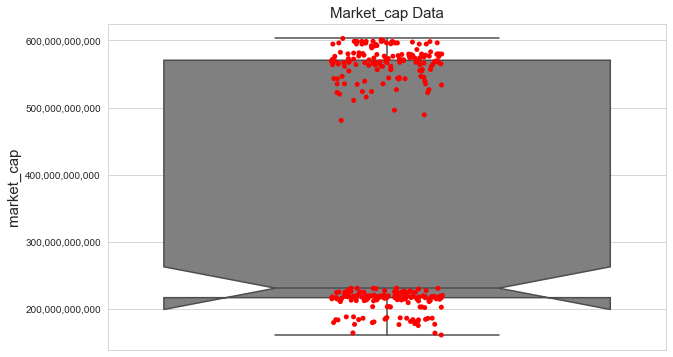

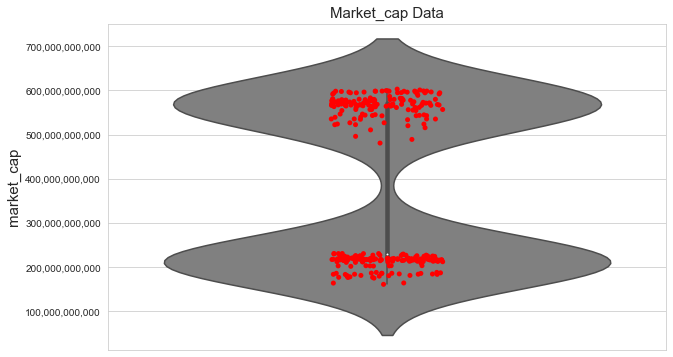

Market_cap Statistics:
25%:  216847156779.0
75%:  570513018761.0
IQR:  353665861982.0
upper_boundary:  1101011811734.0
lower_boundary:  -313651636194.0
total_outliers:  0
total_count:  305
%_of_outlier_data:  0.0%


Market_cap Outlier Sample Data:
Series([], Name: market_cap, dtype: int64)


In [11]:
# Found lower bound and upper_bound of a variable.
def find_boundaries(data, variable):

    # IQR = Difference between 75% - 25% value.
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)

    # Estimate 1.5 times or 3 times the IQR to calculate.
    lower_boundary = data[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

 # Provide data & chart for each numerical column.
for col in data[numerical_cols]:
    
    # PLotting box & whisker chart for each numerical column.
    plt.figure(figsize=(10,6))
    sns.set_style('whitegrid')
    plt.title(col.capitalize() + ' Data', fontsize = 15)
    sns.boxplot(y = col, data=data, color = 'grey', notch=True)
    sns.stripplot(y = col, data=data, color = 'red')
    plt.ylabel(col, fontsize = 15)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    plt.show()
    
    # PLotting violin chart for each numerical column.
    plt.figure(figsize=(10,6))
    sns.set_style('whitegrid')
    plt.title(col.capitalize() + ' Data', fontsize = 15)
    sns.violinplot(y = col, data=data, color = 'grey')
    sns.stripplot(y = col, data=data, color = 'red')
    plt.ylabel(col, fontsize = 15)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    plt.show()
    
    # Calculating lower & upper bound, IQR, count of outlier data, % of outlier data and sample outlier data.
    two_five_pect =  data[col].quantile(0.25)
    seven_five_pect =  data[col].quantile(0.75)
    IQR = seven_five_pect - two_five_pect
    
    upper_boundary, lower_boundary = find_boundaries(data, col)
    
    outliers = np.where(data[col] > upper_boundary, True,
                    np.where(data[col] < lower_boundary, True, False))
    
    outliers_data = data.loc[outliers, col]

    pect_outlier_data = round((outliers.sum()/data.shape[0] * 100), 2).astype(str) + '%'
    
    # Printing all statistic data.
    print(col.capitalize() + ' Statistics:')
    print('25%: ', two_five_pect)
    print('75%: ', seven_five_pect)
    print('IQR: ', IQR)
    print('upper_boundary: ', upper_boundary)
    print('lower_boundary: ', lower_boundary)
    print('total_outliers: ', outliers.sum())
    print('total_count: ', data.shape[0])
    print('%_of_outlier_data: ', pect_outlier_data)
    
    print('\n')
    print(col.capitalize(), 'Outlier Sample Data:')
    print(outliers_data.head())

### Analysis of Detecting Outliers

No column has outliers.

# Data Exploration & Transformation – Feature Extraction 

In [12]:
# Extracting all date and time features from date.
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data ['day'] = data['date_time'].dt.day
data['weekday'] = data['date_time'].dt.dayofweek
data['dayofyear'] = data['date_time'].dt.dayofyear
data['week'] = data['date_time'].dt.week
data['quarter'] = data['date_time'].dt.quarter
data['hour'] = data['date_time'].dt.hour
data['minute'] = data['date_time'].dt.minute

data

,date_time,symbol,institution_total_holdings_usd,institution_holdings_per_share,total_address,new_address,active_address,transaction_count,transfers_volume_sum,tweets_count,crypto_volume_24h,price,market_cap,year,month,day,weekday,dayofyear,week,quarter,hour,minute
0,2022-06-03 22:29:00,BTC,19360000000,27.96,984824555,407870,953104,264776,2253034,117717,26587962530,29814,568192940280,2022,6,3,4,154,22,2,22,29
1,2022-06-03 22:29:00,BTC,19360000000,27.96,984824555,407870,953104,264776,2253034,117717,26587962530,29814,568192940280,2022,6,3,4,154,22,2,22,29
2,2022-06-04 04:29:00,BTC,18960000000,27.29,985241153,416598,942496,267374,2017528,109165,26014768622,29657,565190318332,2022,6,4,5,155,22,2,4,29
3,2022-06-04 18:29:00,BTC,18960000000,27.29,985241153,416598,942496,267374,2017528,109165,17081484905,29749,566975235789,2022,6,4,5,155,22,2,18,29
4,2022-06-04 18:29:00,BTC,18960000000,27.29,985241153,416598,942496,267374,2017528,109165,17081484905,29749,566975235789,2022,6,4,5,155,22,2,18,29
5,2022-06-04 18:29:00,BTC,18960000000,27.29,985241153,416598,942496,267374,2017528,109165,17081484905,29749,566975235789,2022,6,4,5,155,22,2,18,29
6,2022-06-04 19:29:00,BTC,18960000000,27.29,985241153,416598,942496,267374,2017528,109165,16712504078,29709,566211896655,2022,6,4,5,155,22,2,19,29
7,2022-06-04 20:29:00,BTC,18960000000,27.29,985241153,416598,942496,267374,2017528,109165,16515741140,29707,566163814355,2022,6,4,5,155,22,2,20,29
8,2022-06-04 21:29:00,BTC,18960000000,27.29,985241153,416598,942496,267374,2017528,109165,16426748127,29775,567475399517,2022,6,4,5,155,22,2,21,29
9,2022-06-04 22:29:00,BTC,18960000000,27.29,985241153,416598,942496,267374,2017528,109165,16558709537,29881,569492250750,2022,6,4,5,155,22,2,22,29


In [13]:
# Find all the numerical columns.
mod_numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[mod_numerical_cols].dtypes

institution_total_holdings_usd      int64
institution_holdings_per_share    float64
total_address                       int64
new_address                         int64
active_address                      int64
transaction_count                   int64
transfers_volume_sum                int64
tweets_count                        int64
crypto_volume_24h                   int64
price                               int64
market_cap                          int64
year                                int64
month                               int64
day                                 int64
weekday                             int64
dayofyear                           int64
week                                int64
quarter                             int64
hour                                int64
minute                              int64
dtype: object

# Data Exploration & Transformation – Feature Engineering 
## 1. Timeseries
### • Bitcoin Timeseries
### • Ethereum Timeseries
## 2. Stationary Test
### • Bitcoin Stationary Test
### • Ethereum Stationary Test

## 1. Timeseries
Creating a timeseries for each variable to identify patterns such as trends, seasonality, and cyclicality.

In [14]:
# Spliting data between btc & eth.
btc_data = pd.DataFrame(data[data['symbol'] == 'BTC'])
eth_data = data[data['symbol'] == 'ETH']

In [15]:
# Creating modified feature variable.
mod_feature_var = ['price', 'institution_total_holdings_usd', 'institution_holdings_per_share', 'total_address', 'new_address', 
                   'active_address', 'transaction_count', 'transfers_volume_sum', 'tweets_count', 'crypto_volume_24h',
                   'market_cap', 'year', 'month', 'day', 'weekday', 'dayofyear', 'week', 'quarter', 'hour', 'minute']

### Bitcoin Timeseries

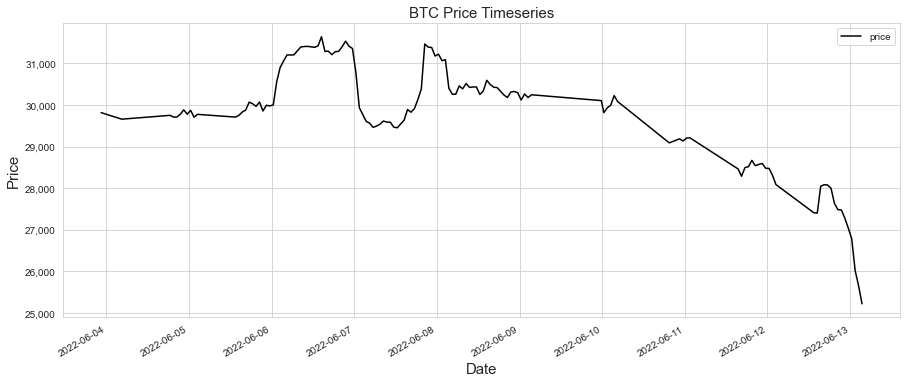

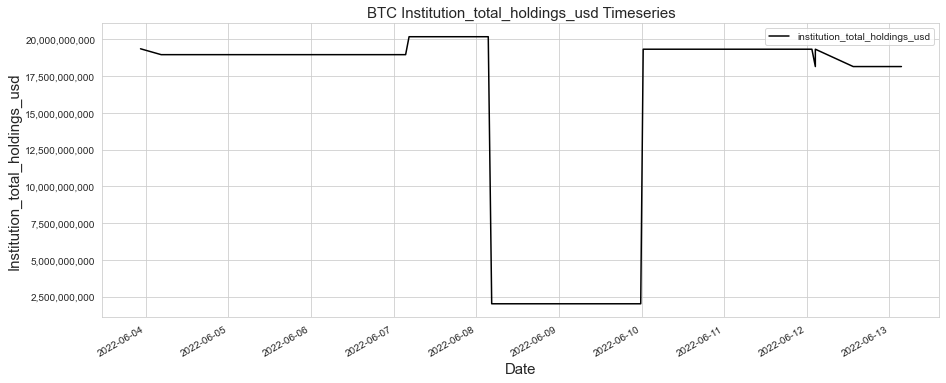

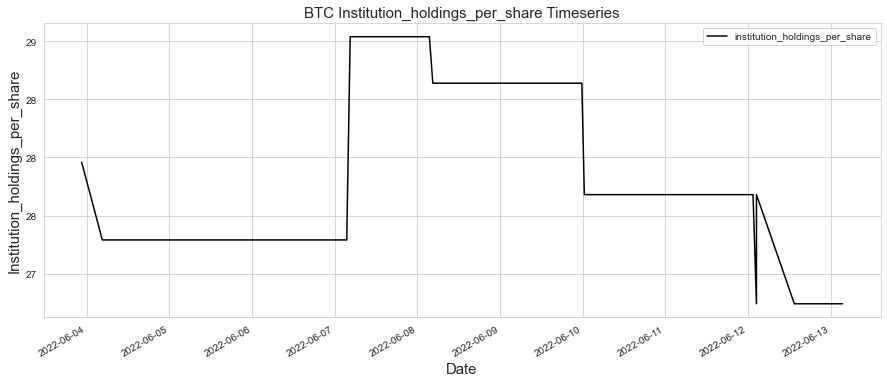

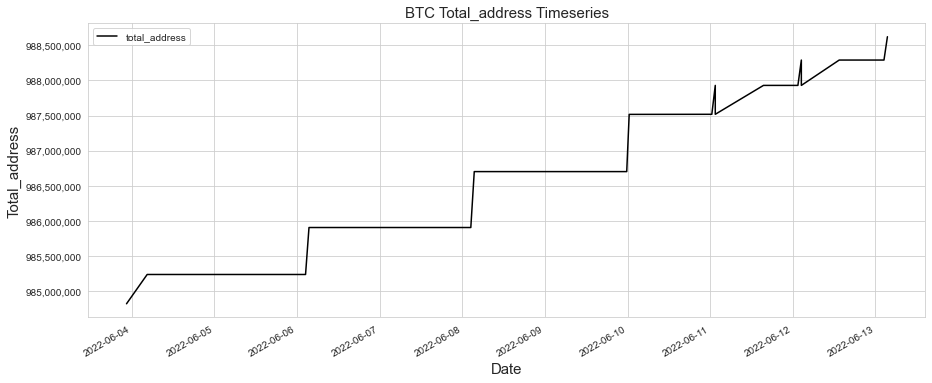

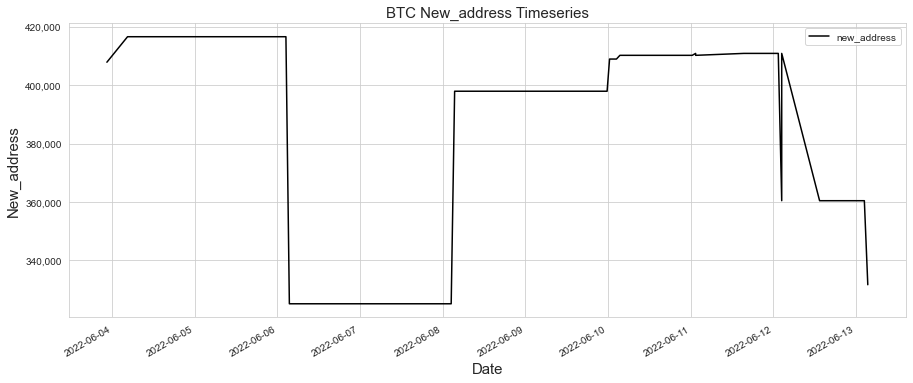

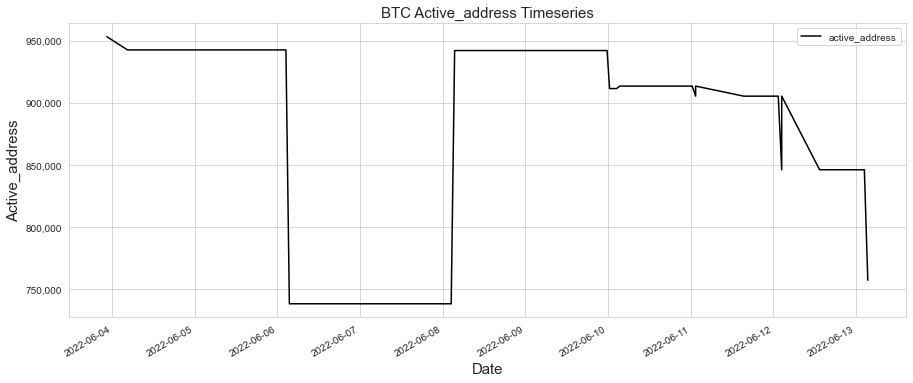

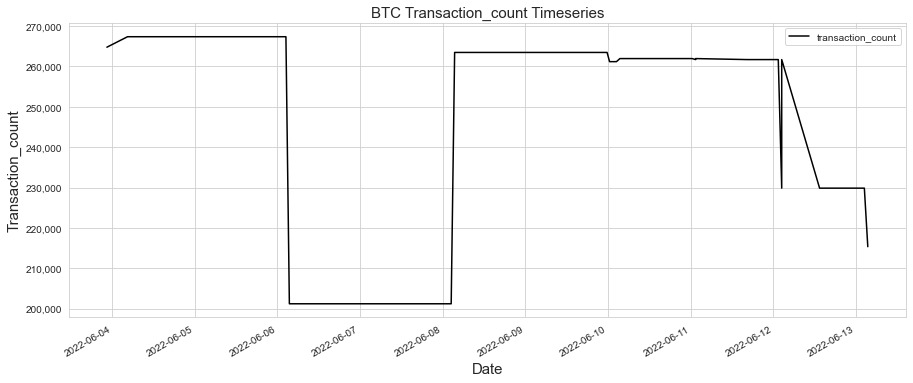

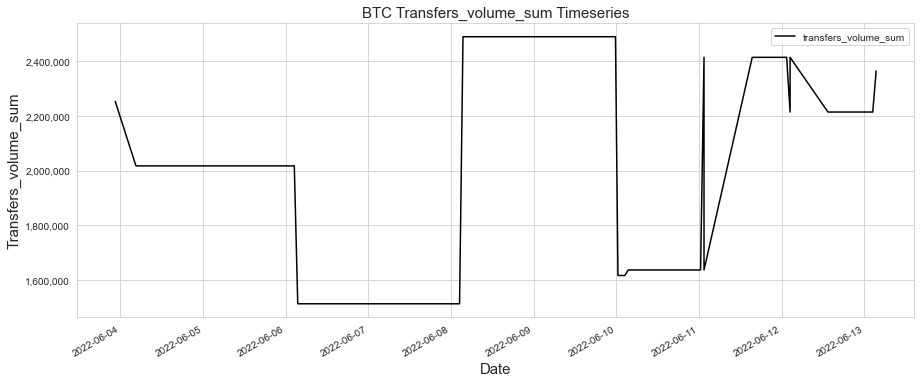

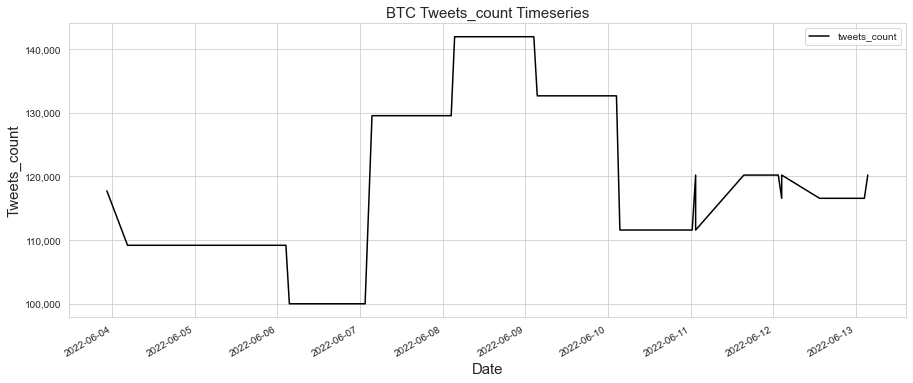

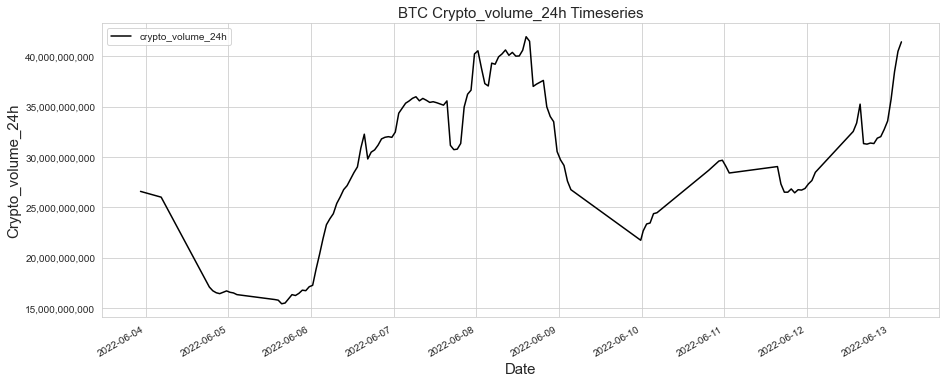

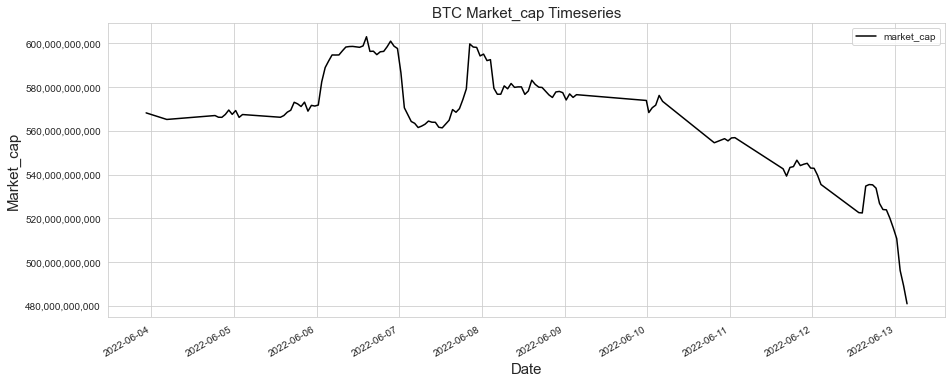

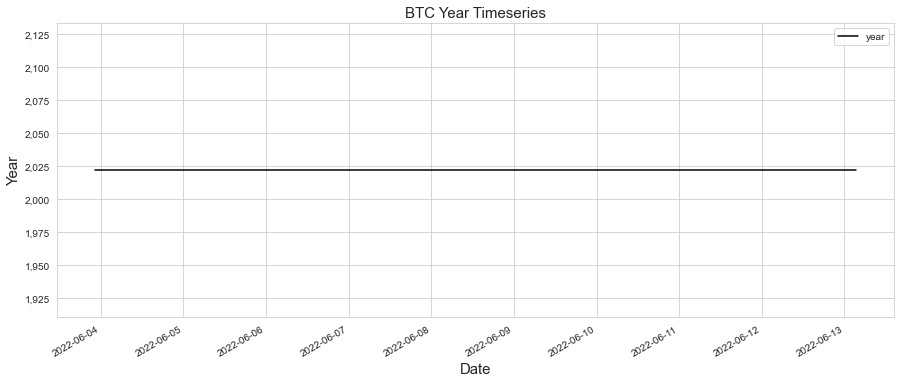

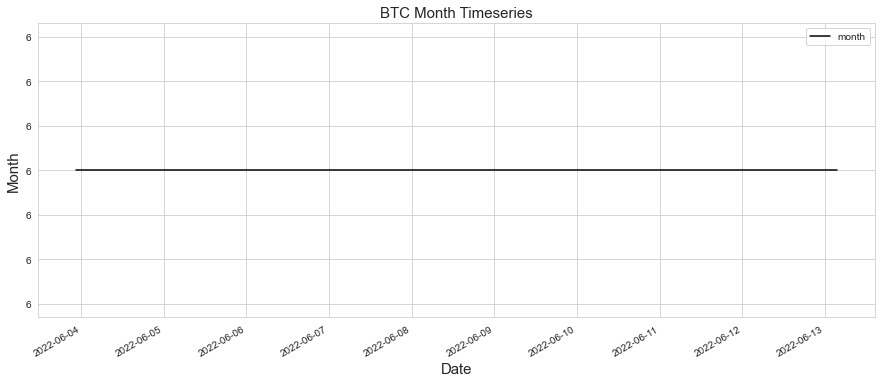

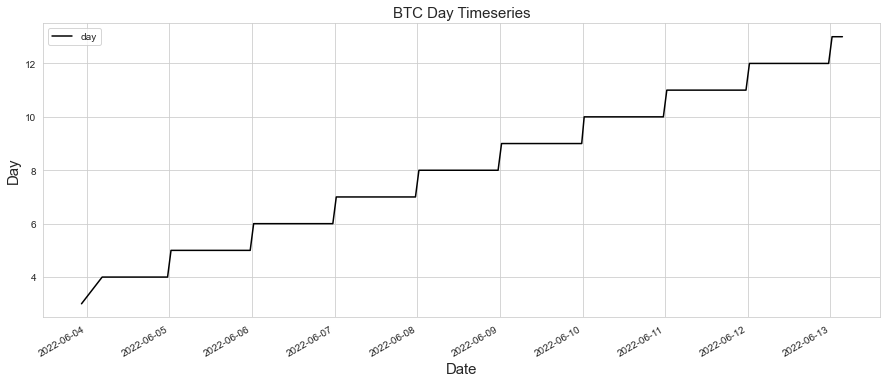

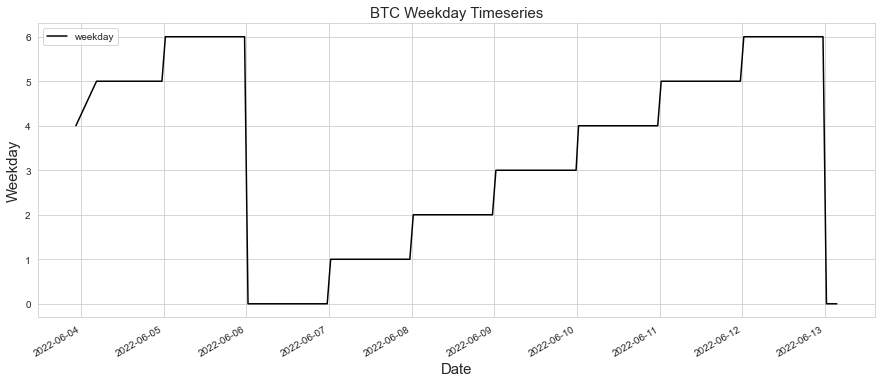

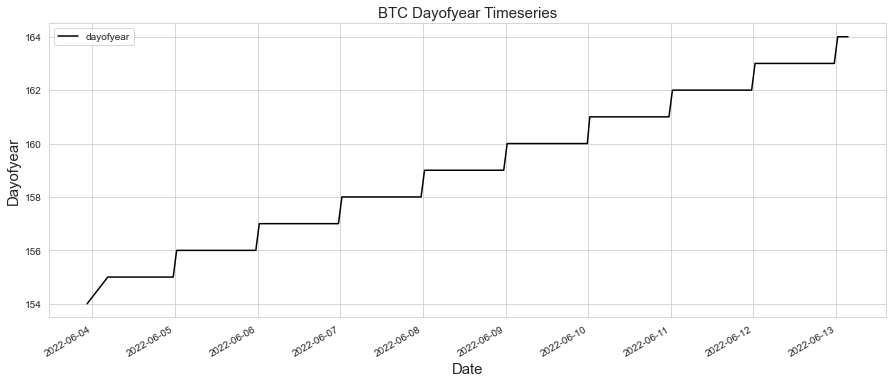

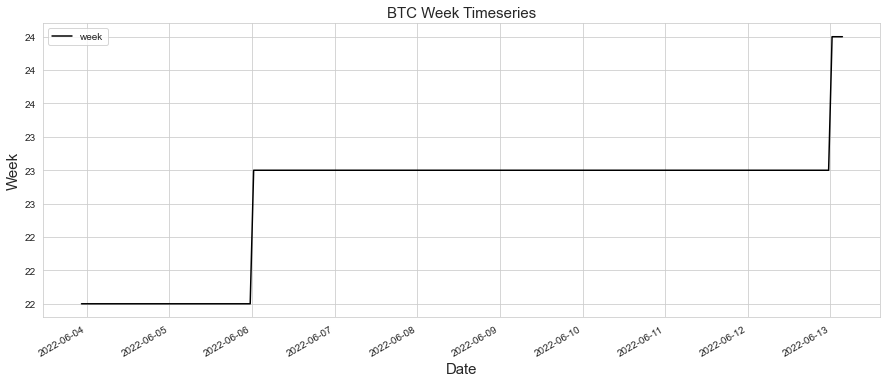

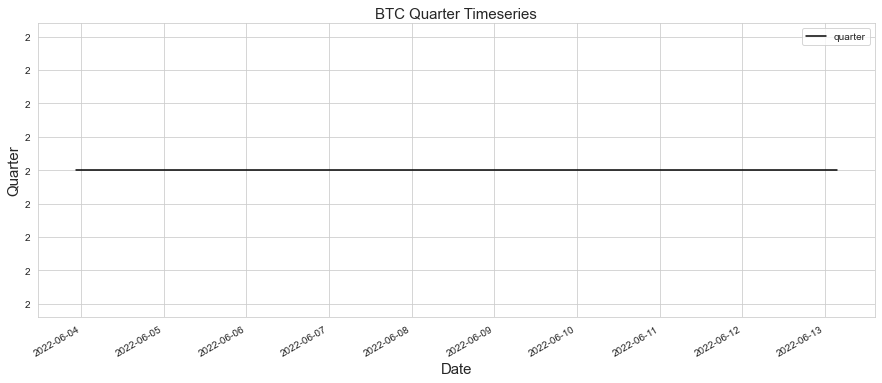

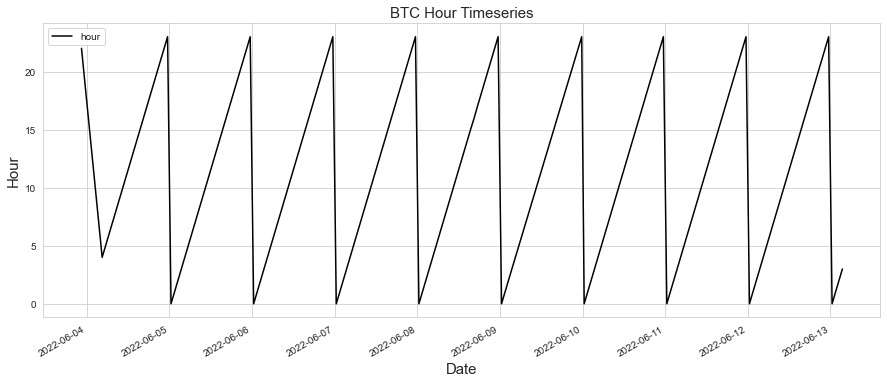

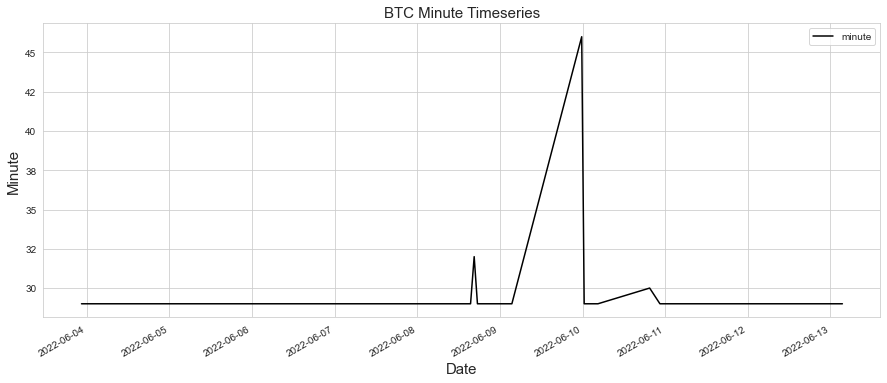

In [16]:
# Visualizing all bitcoin variables.
for i in mod_feature_var:
    btc_data.plot(x = 'date_time', y = i, figsize=(15, 6), color = 'k')
    plt.xlabel("Date", fontsize = 15)
    plt.ylabel(i.capitalize(), fontsize = 15)
    plt.title(f"BTC {str(i).capitalize()} Timeseries", fontsize = 15)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    plt.show()

### Ethereum Timeseries

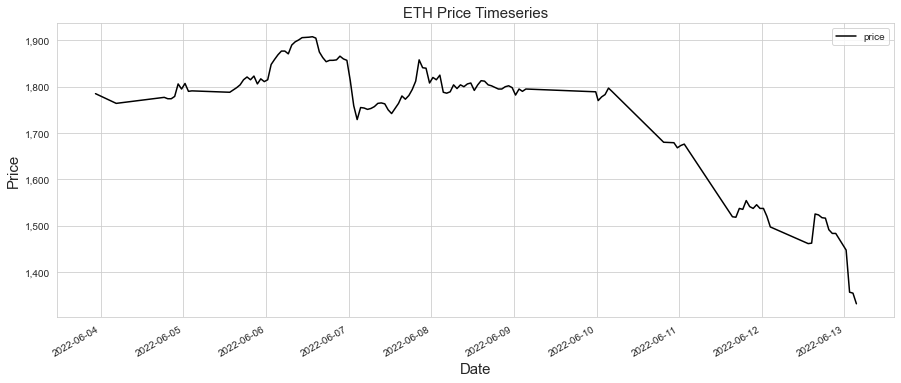

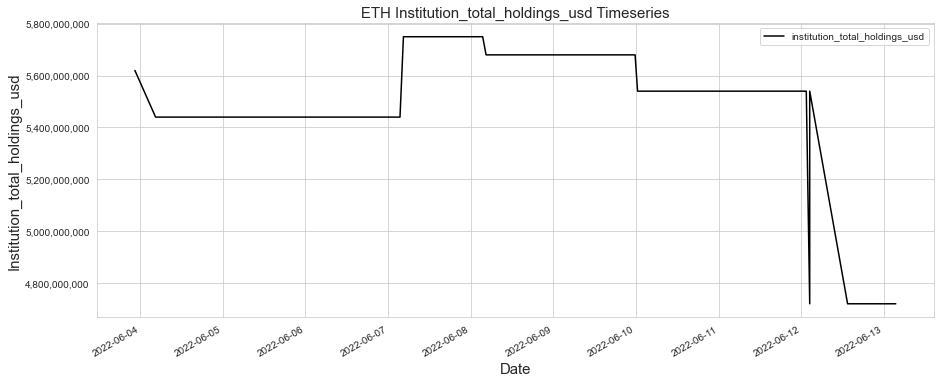

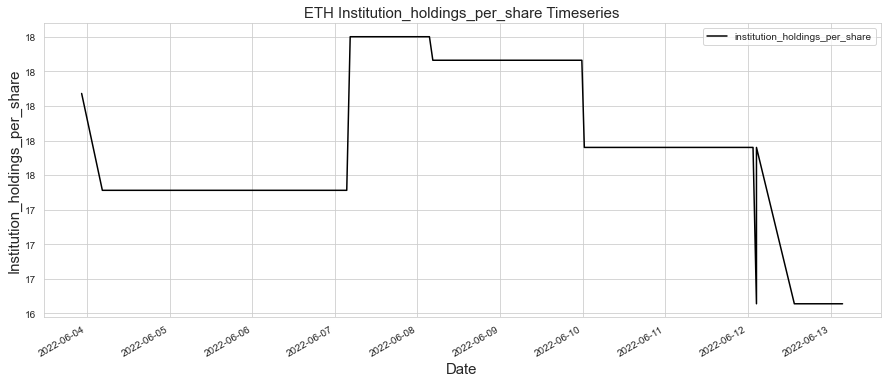

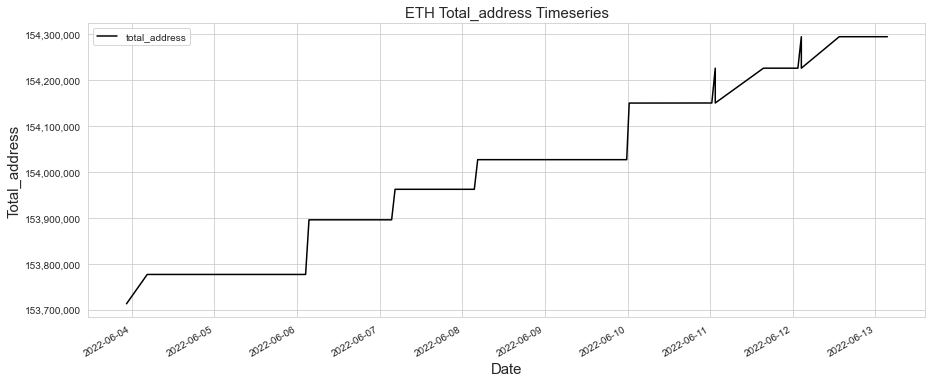

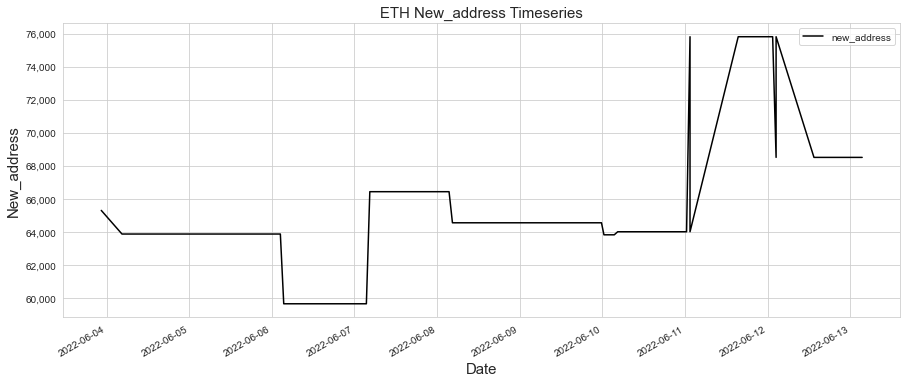

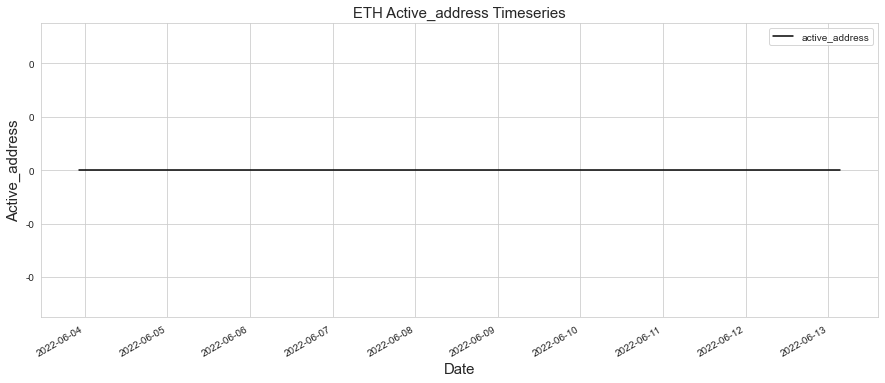

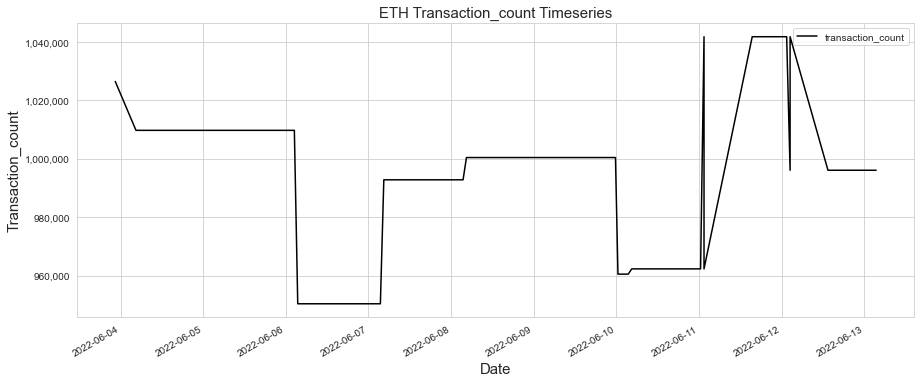

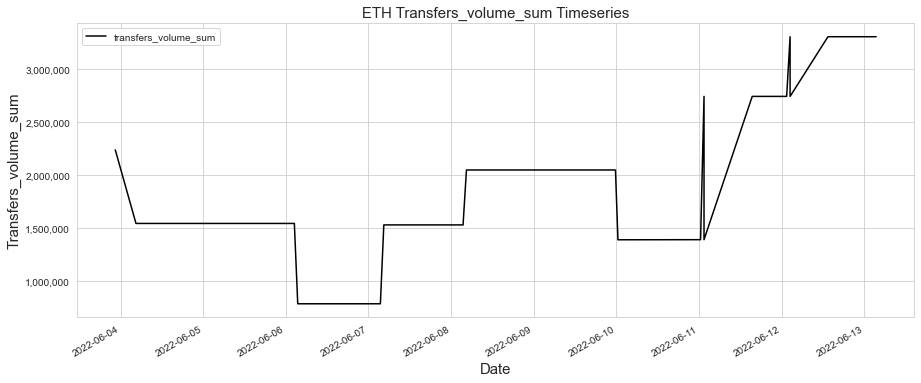

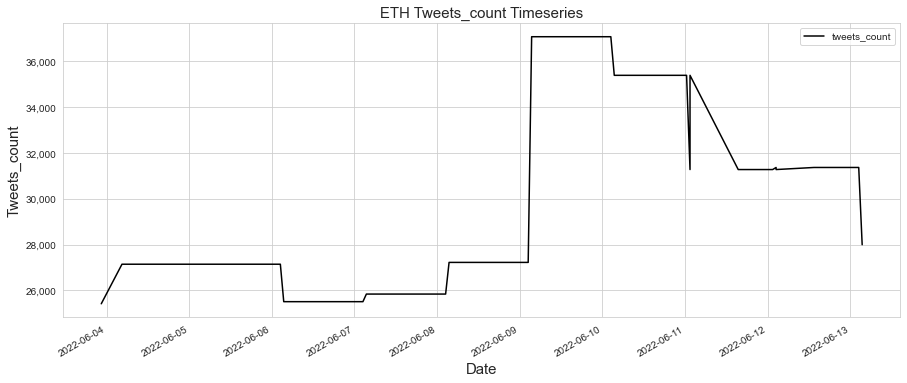

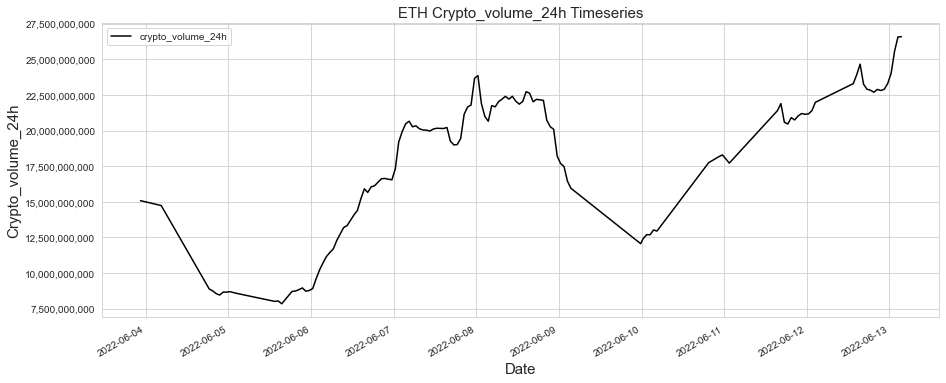

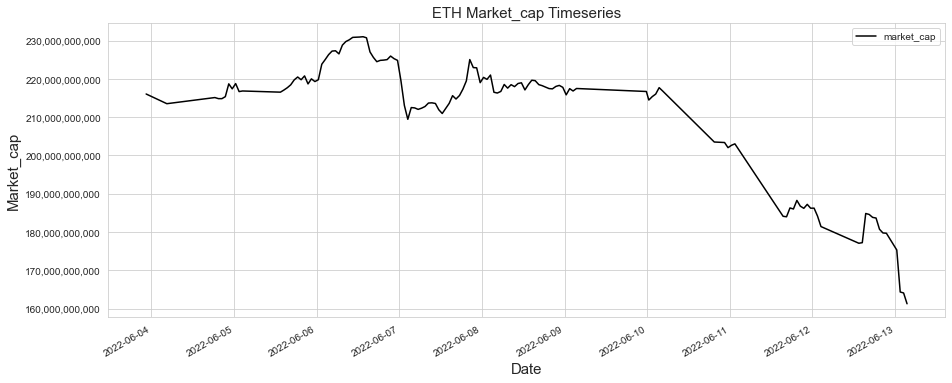

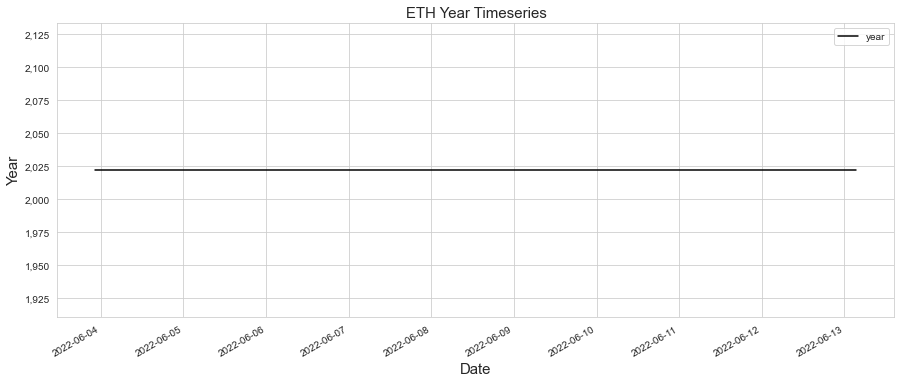

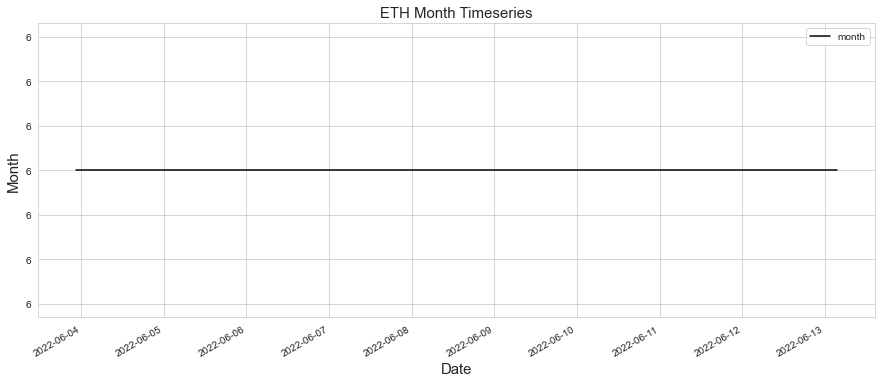

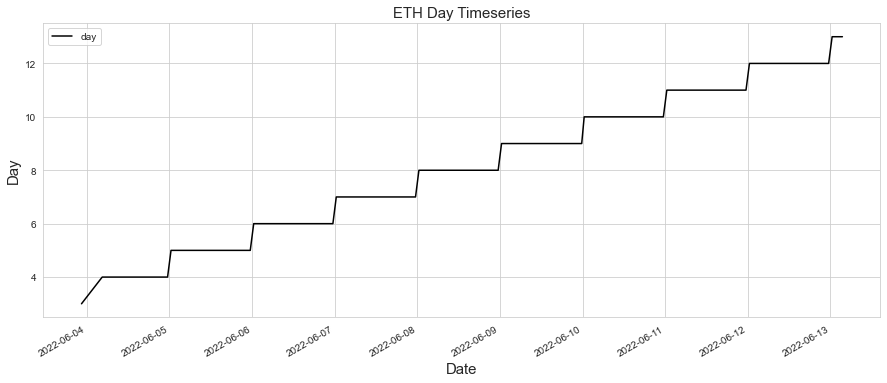

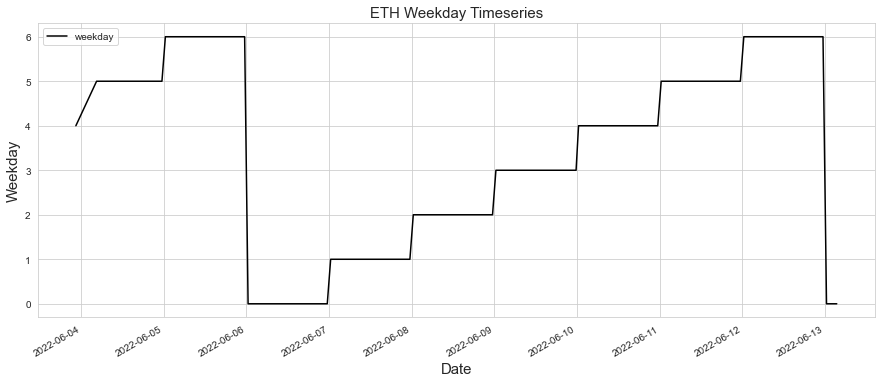

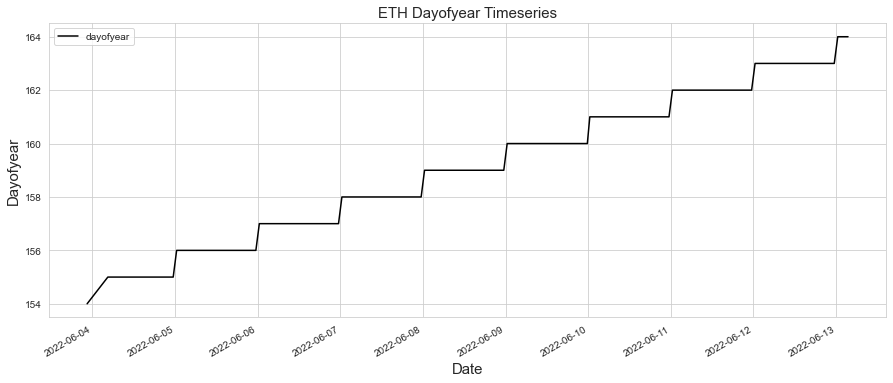

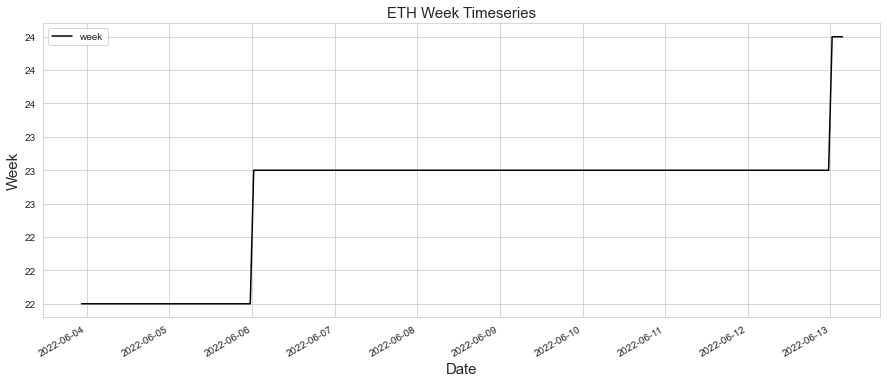

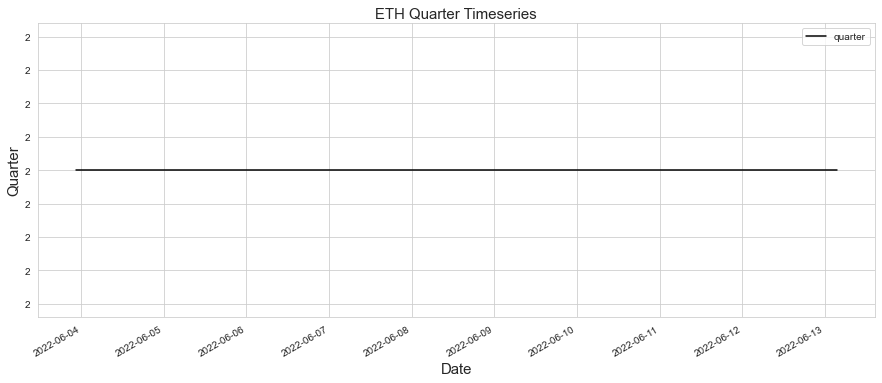

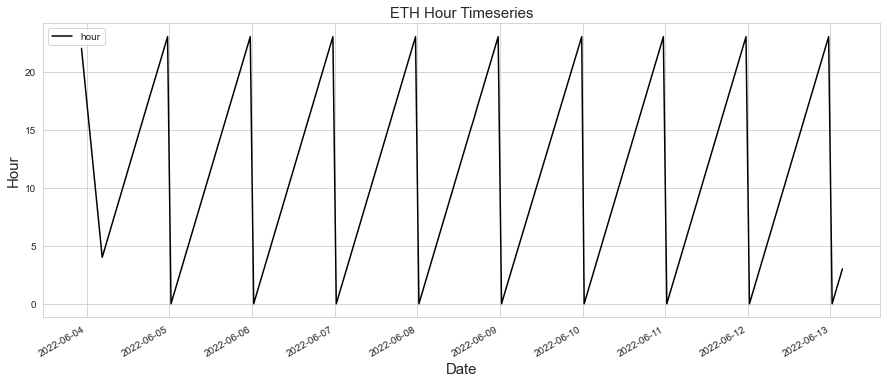

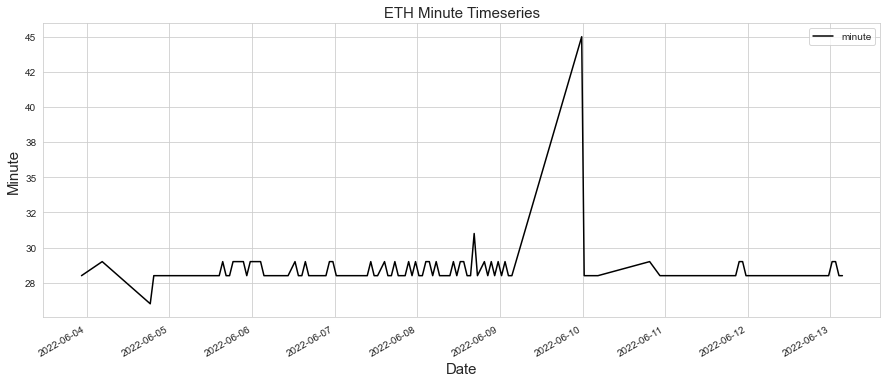

In [17]:
# Visualizing all ethereum variables.
for i in mod_feature_var:
    eth_data.plot(x = 'date_time', y = i, figsize=(15, 6), color = 'k')
    plt.xlabel("Date", fontsize = 15)
    plt.ylabel(i.capitalize(), fontsize = 15)
    plt.title(f"ETH {str(i).capitalize()} Timeseries", fontsize = 15)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    plt.show()

## 2. Stationarity Test
Stationarity test is conducted to understand that there is no trend or seasonal component.

In [18]:
# Function for running dickey fuller test.
def Augmented_Dickey_Fuller_Test_func(series , column_name): 
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

### Bitcoin Stationarity Test

In [19]:
# Checking stationarity for each bitcoin variable.
for i in mod_feature_var:
    Augmented_Dickey_Fuller_Test_func(btc_data[i], 'BTC ' + i.capitalize())
    print('\n')

Results of Dickey-Fuller Test for column: BTC Price
Test Statistic                   1.089933
p-value                          0.995130
No Lags Used                     1.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: BTC Institution_total_holdings_usd
Test Statistic                  -1.939662
p-value                          0.313639
No Lags Used                     0.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: BTC Institution_holdings_per_share
Test Statistic        

### Ethereum Stationarity Test

In [20]:
# Checking stationarity for each ethereum variable.
for i in mod_feature_var:
    Augmented_Dickey_Fuller_Test_func(eth_data[i], 'ETH ' + i.capitalize())
    print('\n')

Results of Dickey-Fuller Test for column: ETH Price
Test Statistic                   1.323527
p-value                          0.996737
No Lags Used                     0.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: ETH Institution_total_holdings_usd
Test Statistic                  -0.701352
p-value                          0.846399
No Lags Used                     4.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: ETH Institution_holdings_per_share
Test Statistic        

### Analysis of Feature Engineering

All variables except hour and minute are stationary.

# Data Exploration & Transformation  -  Feature Selection

Using Random Forest algorithm to identify relevant features for model building.

## Bitcoin Feature Selection

In [21]:
# Train random forest for regression and select features. Select from model will select those features which importance
# is greater than the mean importance of all the features.
sel_ = SelectFromModel(XGBRegressor(n_estimators=100))
sel_.fit(btc_data[mod_feature_var], btc_data[target_var])

SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, gamma=None,
                                       gpu_id=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       learning_rate=None, max_bin=None,
                                       max_cat_to_onehot=None,
                                       max_delta_step=None, max_depth=None,
                                       max_leaves=None, min_child_weight=None,
                                   

In [22]:
# Count the selected features.
selected_feat = btc_data[mod_feature_var].columns[(sel_.get_support())]
len(selected_feat)

1

In [23]:
# Comparing amount of selected features with the amount of features which importance is above themean importance.

print('total features: {}'.format((btc_data[mod_feature_var].shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))

total features: 20
selected features: 1
features with coefficients greater than the mean coefficient: 1


In [24]:
# Selected features.
selected_features = selected_feat
selected_features

Index(['price'], dtype='object')

In [25]:
# Data with selected features.
btc_data = btc_data[['date_time', 'price']]
btc_data.set_index('date_time', inplace=True)
btc_data

,price
date_time,
2022-06-03 22:29:00,29814
2022-06-03 22:29:00,29814
2022-06-04 04:29:00,29657
2022-06-04 18:29:00,29749
2022-06-04 18:29:00,29749
2022-06-04 18:29:00,29749
2022-06-04 19:29:00,29709
2022-06-04 20:29:00,29707
2022-06-04 21:29:00,29775


## Ethereum Feature Selection

In [26]:
# Train random forest for regression and select features. SelectFrom model will select those features which importance
# is greater than the mean importance of all the features.
sel_ = SelectFromModel(XGBRegressor(n_estimators=100, random_state=10))
sel_.fit(eth_data[mod_feature_var], eth_data[target_var])

SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, gamma=None,
                                       gpu_id=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       learning_rate=None, max_bin=None,
                                       max_cat_to_onehot=None,
                                       max_delta_step=None, max_depth=None,
                                       max_leaves=None, min_child_weight=None,
                                   

In [27]:
# Count the selected features.
selected_feat = eth_data[mod_feature_var].columns[(sel_.get_support())]
len(selected_feat)

1

In [28]:
# Comparing amount of selected features with the amount of features which importance is above themean importance.

print('total features: {}'.format((eth_data[mod_feature_var].shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))

total features: 20
selected features: 1
features with coefficients greater than the mean coefficient: 1


In [29]:
# Selected features.
selected_features = selected_feat
selected_features

Index(['price'], dtype='object')

In [30]:
# Data with selected features.
eth_data = eth_data[['date_time', 'price']]
eth_data.set_index('date_time', inplace =True)
eth_data

,price
date_time,
2022-06-03 22:28:00,1785
2022-06-03 22:28:00,1785
2022-06-04 04:29:00,1764
2022-06-04 18:26:00,1777
2022-06-04 18:26:00,1777
2022-06-04 18:26:00,1777
2022-06-04 19:28:00,1774
2022-06-04 20:28:00,1774
2022-06-04 21:28:00,1779


### Analysis of Feature Selection

Random Forest only identified Price as the only variable for model bulding under Bitcoin and Ethereum.

# Predictive Modeling - Model Building

Below algorithms helps to predict future Bitcoin and Ethereum prices using historical prices.

## Bitcoin
### 1. Train Test Split
### 2. Auto Arima

## Ethereum
### 1. Train Test Split
### 2. Auto Arima

## Bitcoin
### 1. Train Test Split

In [31]:
# Splitting test & train Data.
train_btc = btc_data[:122]
test_btc = btc_data[-30:]

### 2. Auto Arima

In [32]:
# Running auto arima model.
stepwise_model = auto_arima(train_btc, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1519.800, Time=0.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1553.077, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1529.549, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1518.468, Time=0.31 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1551.398, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1520.089, Time=0.42 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1520.094, Time=1.14 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1530.365, Time=0.15 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.87 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1521.345, Time=0.17 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1519.526, Time=0.41 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1517.928, Time=0.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1550.748, Time=0.02 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1519.578, Time=0.37 sec
 ARIMA(1,1,0)(0,1,2)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  122
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -755.964
Date:                              Mon, 18 Jul 2022   AIC                           1517.928
Time:                                      15:23:23   BIC                           1526.002
Sample:                                           0   HQIC                          1521.203
                                              - 122                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1753      0.051      3.409      0.001       0.074       0.276
ma.S.L12      -0.6586      0.076     -8.634      0.000      -0.808      -0.509
sigma2      4.729e+04   2903.833     16.284      0.000    4.16e+04     5.3e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):               143.53
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.26
Prob(H) (two-sided):                  0.76   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
# Displaying actual vs predicted values.
pred_btc = pd.DataFrame(stepwise_model.predict(n_periods=len(test_btc)))
pred_btc.columns = ['predicted_value']

test_btc.reset_index(inplace =True)
                                              
arima_pred_btc = pd.merge(test_btc, pred_btc, left_index=True, right_index=True)
arima_pred_btc.set_index('date_time', inplace =True)
arima_pred_btc

,price,predicted_value
date_time,,
2022-06-11 15:29:00,28462,29403.229434
2022-06-11 16:29:00,28287,29400.243571
2022-06-11 17:29:00,28495,29498.043220
2022-06-11 18:29:00,28515,29440.572151
2022-06-11 19:29:00,28668,29055.546825
2022-06-11 19:29:00,28668,28998.839122
2022-06-11 20:29:00,28539,29104.008653
2022-06-11 21:29:00,28571,28980.234799
2022-06-11 22:29:00,28593,28991.421017


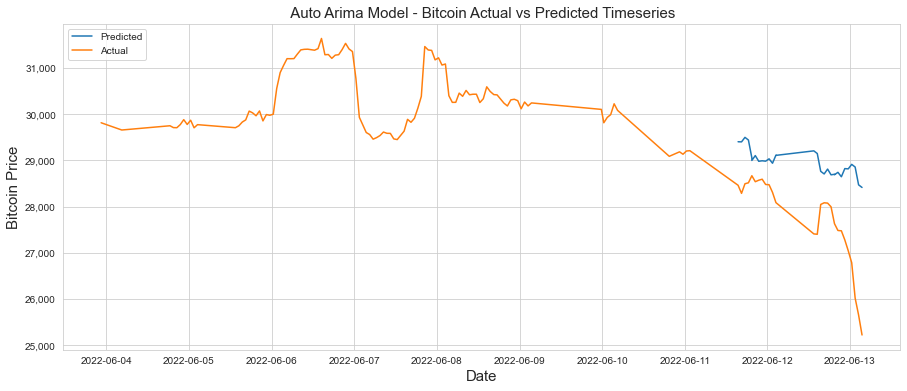

In [34]:
# Visualizing actual vs predicted values.
plt.figure(figsize=(15,6))
plt.plot(arima_pred_btc[['predicted_value']],label="Predicted")
plt.plot(btc_data[['price']],label="Actual")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Bitcoin Price", fontsize = 15)
plt.title(" Auto Arima Model - Bitcoin Actual vs Predicted Timeseries", fontsize = 15)
plt.legend(loc= 'upper left')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [35]:
# Evaluting algorithm performance.
mse_btc_arima = metrics.mean_squared_error(arima_pred_btc['price'], arima_pred_btc['predicted_value'])
mae_btc_arima = metrics.mean_absolute_error(arima_pred_btc['price'], arima_pred_btc['predicted_value'])
rmse_btc_arima = np.sqrt(metrics.mean_squared_error(arima_pred_btc['price'], arima_pred_btc['predicted_value']))
mape_btc_arima = mean_absolute_percentage_error(arima_pred_btc['price'], arima_pred_btc['predicted_value'])

print("mse: ", mse_btc_arima)
print("mae: ", mae_btc_arima)
print("rmse: ", rmse_btc_arima)
print("mape: ", mape_btc_arima)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

mse:  1918401.5834022046
mae:  1165.4924685136834
rmse:  1385.0637470536165
mape:  0.04285576549175784


## Ethereum
### 1. Train Test Split

In [36]:
# Splitting test & train Data.
train_eth = eth_data[:123]
test_eth = eth_data[-30:]

### 2. Auto Arima

In [37]:
# Running auto arima model.
stepwise_model = auto_arima(train_eth, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=955.246, Time=0.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=978.473, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=965.763, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=952.142, Time=0.19 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=980.187, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=966.223, Time=0.11 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.21 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=951.392, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=966.151, Time=0.06 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=951.884, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  123
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -473.696
Date:                              Mon, 18 Jul 2022   AIC                            951.392
Time:                                      15:23:29   BIC                            956.793
Sample:                                           0   HQIC                           953.583
                                              - 123                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.8603      0.210     -4.096      0.000      -1.272      -0.449
sigma2       279.7249     20.423     13.697      0.000     239.696     319.753
===================================================================================
Ljung-Box (L1) (Q):                   1.27   Jarque-Bera (JB):               769.79
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               2.33   Skew:                            -2.32
Prob(H) (two-sided):                  0.01   Kurtosis:                        15.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
# Displaying actual vs predicted values.
pred_eth = pd.DataFrame(stepwise_model.predict(n_periods=len(test_eth)))
pred_eth.columns = ['predicted_value']

test_eth.reset_index(inplace = True)
                                              
arima_pred_eth = pd.merge(test_eth, pred_eth, left_index=True, right_index=True)
arima_pred_eth.set_index('date_time', inplace =True)
arima_pred_eth

,price,predicted_value
date_time,,
2022-06-11 15:28:00,1519,1684.776285
2022-06-11 16:28:00,1518,1682.627860
2022-06-11 17:28:00,1537,1687.520036
2022-06-11 18:28:00,1535,1679.986245
2022-06-11 19:28:00,1554,1657.947754
2022-06-11 19:28:00,1554,1655.510817
2022-06-11 20:28:00,1541,1664.448136
2022-06-11 21:29:00,1537,1655.295810
2022-06-11 22:29:00,1545,1656.720033


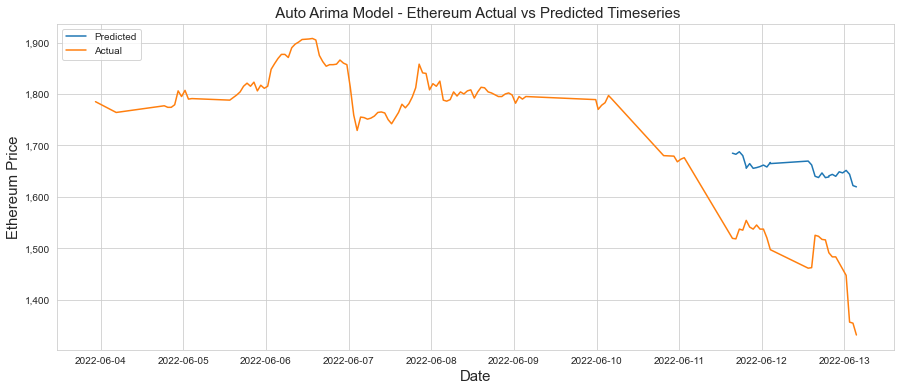

In [39]:
# Visualizing actual vs predicted values.
plt.figure(figsize=(15,6))
plt.plot(arima_pred_eth[['predicted_value']],label="Predicted")
plt.plot(eth_data[['price']],label="Actual")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Ethereum Price", fontsize = 15)
plt.title(" Auto Arima Model - Ethereum Actual vs Predicted Timeseries", fontsize = 15)
plt.legend(loc= 'upper left')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [40]:
# Evaluting algorithm performance.
mse_eth_arima = metrics.mean_squared_error(arima_pred_eth['price'], arima_pred_eth['predicted_value'])
mae_eth_arima = metrics.mean_absolute_error(arima_pred_eth['price'], arima_pred_eth['predicted_value'])
rmse_eth_arima = np.sqrt(metrics.mean_squared_error(arima_pred_eth['price'], arima_pred_eth['predicted_value']))
mape_eth_arima = mean_absolute_percentage_error(arima_pred_eth['price'], arima_pred_eth['predicted_value'])

print("mse: ", mse_eth_arima)
print("mae: ", mae_eth_arima)
print("rmse: ", rmse_eth_arima)
print("mape: ", mape_eth_arima)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

mse:  28292.32116167452
mae:  160.72001340103031
rmse:  168.20321388628255
mape:  0.10909277211172014


# Predictive Modeling -  Model Evaluation

In [41]:
# Capturing all algorithms in a list for dataframe.
algorithm = ['Auto-Arima BTC','Auto-Arima ETH']

# Capturing all evaluation metrics in a list for dataframe.

mse = [mse_btc_arima, mse_eth_arima]

rmse = [rmse_btc_arima, rmse_eth_arima]

mae = [mae_btc_arima, mae_eth_arima]

mape = [mape_btc_arima, mape_eth_arima]

# Adding all the data into dataframe.
model_evaluation_df = pd.DataFrame({'algorithm': algorithm, 'mse': mse, 'rmse': rmse, 'mae': mae, 'mape': mape})

model_evaluation_df

,algorithm,mse,rmse,mae,mape
0,Auto-Arima BTC,1.918402e+06,1385.063747,1165.492469,0.042856
1,Auto-Arima ETH,2.829232e+04,168.203214,160.720013,0.109093


### Analysis on Predictive Modeling

Bitcoin's price prediction is off by 4.28%.

Ethereum's price prediction is off by 10.90%.